In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import pygwalker as pyg
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\heart_2022_with_nans.csv")

In [3]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


<Axes: >

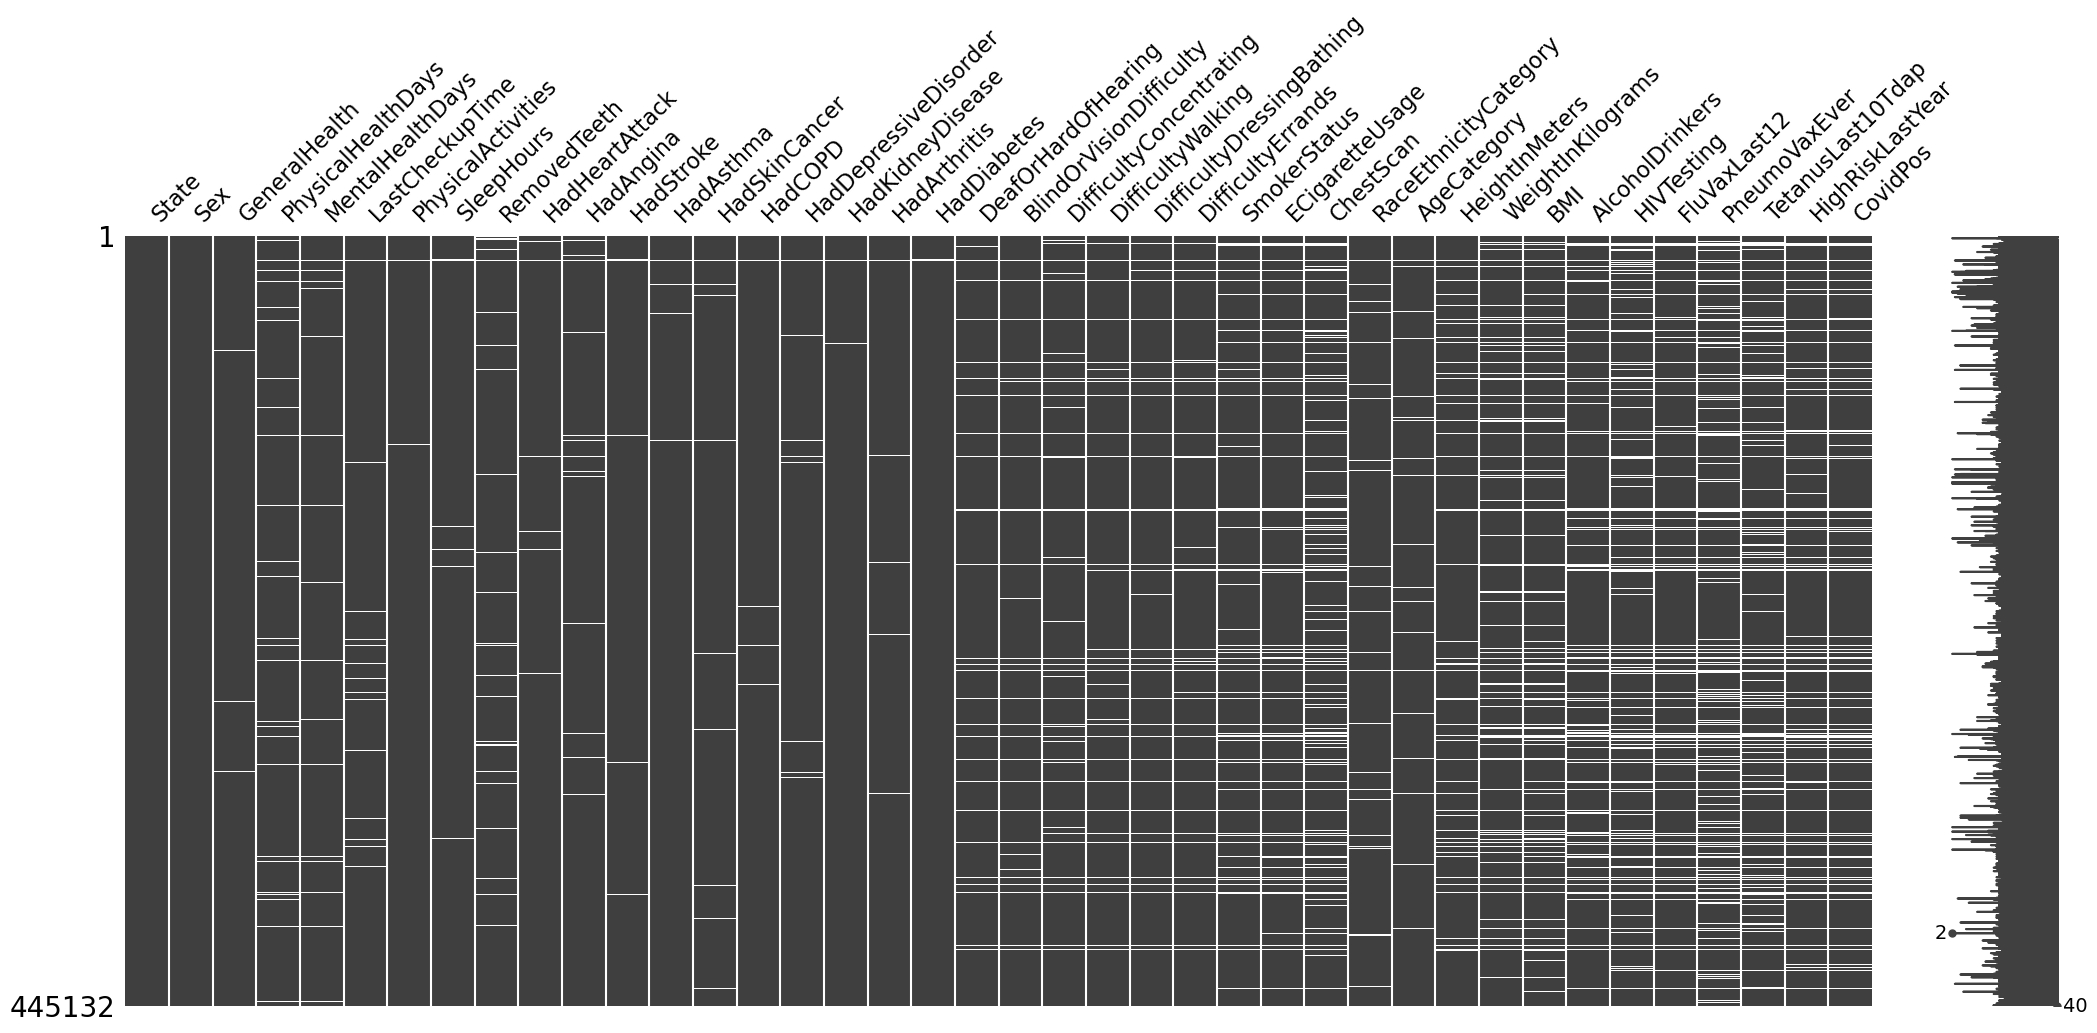

In [4]:
msno.matrix(df)

In [5]:
vars_quant = df.select_dtypes(include='number')

vars_qualt = df.select_dtypes(exclude='number')

In [6]:
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [7]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [8]:
def fill_missing_mode(series):
    if series.dtype == 'O':  # 'O' represents object data type (non-numeric)
        return series.fillna(series.mode().iloc[0])
    else:
        return series

# Apply the function to each column in vars_qualt
df = df.apply(fill_missing_mode, axis=0)

In [9]:
for col in vars_quant.columns:
    df[col] = df.groupby('State')[col].transform(lambda x: x.fillna(x.mean()))

In [10]:
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [11]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [13]:
# Remove multiple elements from the categorical_columns list
vars_qualt = [col for col in vars_qualt if col not in ['State', 'GeneralHealth', 'LastCheckupTime', 'TetanusLast10Tdap', 'RemovedTeeth']]


Duplicates stuff

In [14]:
df[df.duplicated()]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
7310,Alaska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.712013,83.666881,28.399469,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
11503,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.630000,56.700000,21.460000,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
14642,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.570000,47.630000,19.200000,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
17733,Arizona,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.701976,82.042010,28.218583,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
28206,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.706469,80.342657,27.505724,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424819,Wisconsin,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.708019,85.563277,29.166704,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
427638,Wisconsin,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.708019,85.563277,29.166704,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
431351,Wisconsin,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.708019,85.563277,29.166704,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
431653,Wisconsin,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.708019,85.563277,29.166704,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [15]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos


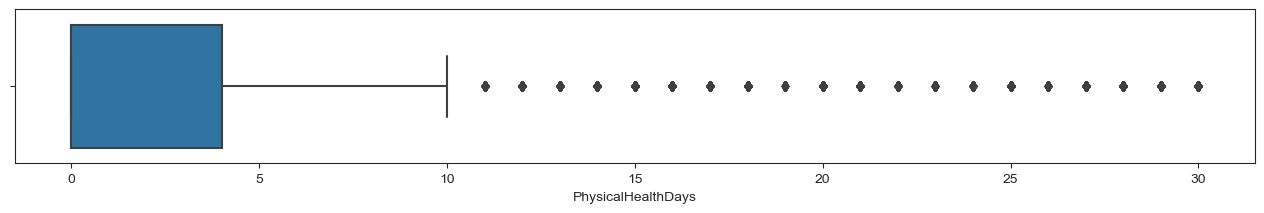

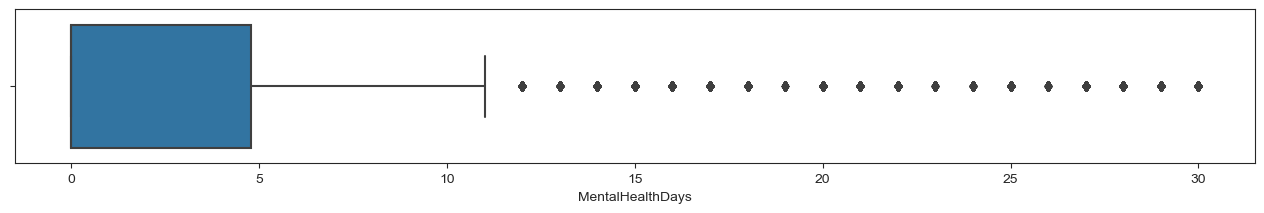

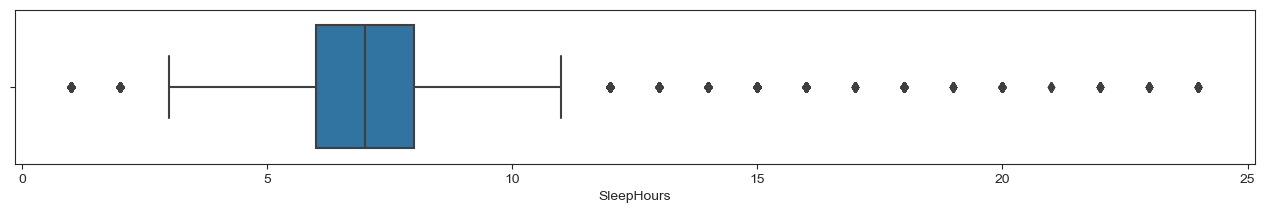

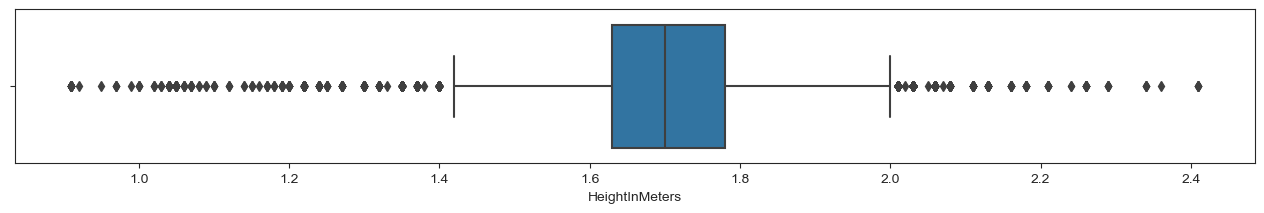

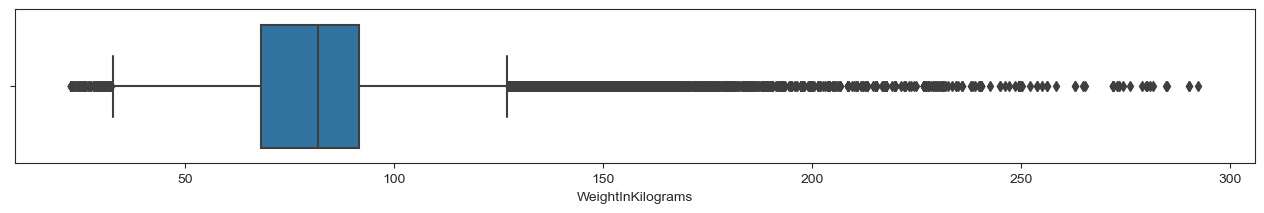

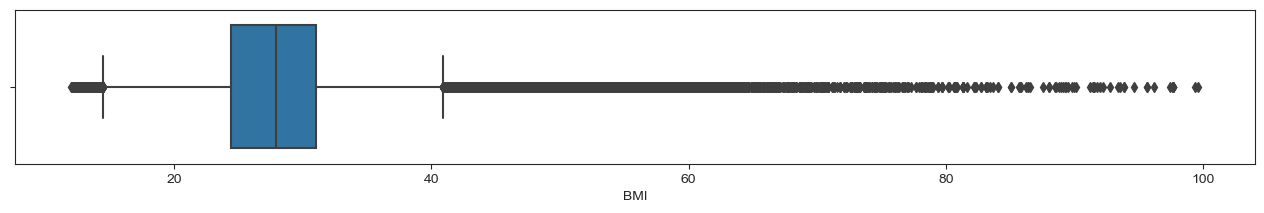

In [16]:
for col in df.describe().columns:
    sns.set_style('ticks')
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=df, x=col)
    plt.show()

In [18]:
#Function for extracting outliers in column of dataframe
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    return outliers, lower_limit, upper_limit

In [19]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(df, 'SleepHours')
sleep_hours_outliers

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
88,Alabama,Female,Excellent,0.000000,0.000000,Within past 2 years (1 year but less than 2 ye...,No,1.0,None of them,No,...,1.600000,54.430000,21.260000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
95,Alabama,Male,Poor,5.065967,0.000000,Within past year (anytime less than 12 months ...,Yes,12.0,None of them,No,...,1.830000,106.590000,31.870000,Yes,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
118,Alabama,Female,Poor,30.000000,30.000000,Within past year (anytime less than 12 months ...,No,18.0,None of them,Yes,...,1.500000,47.170000,21.010000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
127,Alabama,Male,Very good,0.000000,2.000000,Within past year (anytime less than 12 months ...,Yes,12.0,None of them,No,...,1.730000,50.800000,17.030000,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
208,Alabama,Female,Poor,25.000000,0.000000,Within past year (anytime less than 12 months ...,Yes,12.0,None of them,No,...,1.630000,136.080000,51.490000,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444948,Virgin Islands,Female,Fair,2.000000,1.000000,Within past year (anytime less than 12 months ...,Yes,18.0,1 to 5,No,...,1.650000,99.790000,36.610000,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
445066,Virgin Islands,Male,Very good,3.657658,0.000000,Within past year (anytime less than 12 months ...,Yes,20.0,All,No,...,1.800000,86.180000,26.500000,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
445103,Virgin Islands,Female,Good,10.000000,0.000000,Within past year (anytime less than 12 months ...,No,12.0,None of them,Yes,...,1.690927,81.298091,28.457109,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
445108,Virgin Islands,Female,Good,5.000000,2.872515,Within past year (anytime less than 12 months ...,Yes,18.0,None of them,No,...,1.550000,58.970000,24.560000,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [20]:
print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [21]:
# Dropping records with sleep less than 3 hours
df = df.drop(df[df['SleepHours'] < 3].index)
df.reset_index(drop=True, inplace=True)
df.shape

(442124, 40)

In [23]:
# Dropping record with sleep greater than 16 hourss
df = df.drop(df[df['SleepHours'] > 16].index)
df.reset_index(drop=True, inplace=True)
df.shape

(441677, 40)

In [22]:
height_outliers, lower_height, upper_height = get_outliers(df, 'HeightInMeters')
height_outliers

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
553,Alabama,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,No,6.000000,"6 or more, but not all",Yes,...,1.24,86.18,55.64,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
872,Alabama,Female,Poor,30.0,30.0,Within past year (anytime less than 12 months ...,No,9.000000,1 to 5,Yes,...,1.22,136.08,91.55,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
899,Alabama,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,No,8.000000,All,No,...,1.22,44.91,30.21,No,No,No,Yes,"Yes, received Tdap",No,No
1529,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,7.000000,None of them,No,...,2.03,70.31,17.03,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
1546,Alabama,Male,Very good,0.0,0.0,Within past 5 years (2 years but less than 5 y...,No,8.000000,None of them,No,...,2.01,95.25,23.66,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441690,Virgin Islands,Male,Very good,0.0,0.0,5 or more years ago,Yes,7.000000,1 to 5,No,...,2.13,68.04,14.95,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
441716,Virgin Islands,Male,Very good,1.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,7.011283,None of them,No,...,1.27,63.50,39.37,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
441845,Virgin Islands,Male,Poor,30.0,25.0,Within past year (anytime less than 12 months ...,No,5.000000,None of them,Yes,...,2.01,106.14,26.36,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
441932,Virgin Islands,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.000000,"6 or more, but not all",No,...,1.35,63.05,34.79,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [24]:
print(f"Lower Limit:{lower_height})\nUpper Limit:{upper_height})")

Lower Limit:1.4049999999999998)
Upper Limit:2.0050000000000003)


In [25]:
# Dropping records with height less than 1.3 meters
df = df.drop(df[df['HeightInMeters'] < 1.3].index)
df.reset_index(drop=True, inplace=True)
df.shape

(441407, 40)

In [26]:
# Dropping records with height greater than 2.1 meters
df = df.drop(df[df['HeightInMeters'] > 2.1].index)
df.reset_index(drop=True, inplace=True)
df.shape

(441302, 40)

In [27]:
weight_outliers, lower_weight, upper_weight = get_outliers(df, 'WeightInKilograms')
weight_outliers

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
48,Alabama,Female,Good,0.0,18.000000,Within past year (anytime less than 12 months ...,No,8.000000,None of them,No,...,1.73,136.08,45.61,No,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
54,Alabama,Male,Fair,3.0,0.000000,Within past 2 years (1 year but less than 2 ye...,Yes,8.000000,None of them,No,...,1.75,127.01,41.35,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
140,Alabama,Female,Fair,30.0,20.000000,Within past year (anytime less than 12 months ...,Yes,5.000000,None of them,No,...,1.60,145.15,56.68,No,Yes,No,No,"Yes, received Tdap",No,No
156,Alabama,Male,Good,0.0,0.000000,Within past year (anytime less than 12 months ...,No,8.000000,None of them,No,...,1.83,158.76,47.47,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
206,Alabama,Female,Poor,25.0,0.000000,Within past year (anytime less than 12 months ...,Yes,12.000000,None of them,No,...,1.63,136.08,51.49,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441168,Virgin Islands,Male,Fair,0.0,0.000000,Within past year (anytime less than 12 months ...,Yes,6.000000,1 to 5,No,...,1.75,127.01,41.35,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
441180,Virgin Islands,Female,Good,2.0,2.872515,Within past year (anytime less than 12 months ...,No,7.011283,1 to 5,No,...,1.68,163.29,58.10,No,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",Yes,No
441201,Virgin Islands,Female,Good,0.0,0.000000,Within past year (anytime less than 12 months ...,No,7.000000,None of them,No,...,1.70,127.01,43.85,No,Yes,No,No,"Yes, received Tdap",No,Yes
441212,Virgin Islands,Male,Fair,0.0,0.000000,Within past year (anytime less than 12 months ...,No,6.000000,All,No,...,1.85,130.18,37.86,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No


In [28]:
print(f"Lower Limit:{lower_weight})\nUpper Limit:{upper_weight})")

Lower Limit:32.936250000000015)
Upper Limit:126.84624999999998)


In [29]:
# Dropping records with weight less than 40 kg
df = df.drop(df[df['WeightInKilograms'] < 40].index)
df.reset_index(drop=True, inplace=True)
df.shape

(440697, 40)

In [30]:
# Dropping records with weight greater than 200 kg
df = df.drop(df[df['WeightInKilograms'] > 200].index)
df.reset_index(drop=True, inplace=True)
df.shape

(440423, 40)

In this count I think we should limit it to only those who had had a heart attack and see if they had a stroke or not

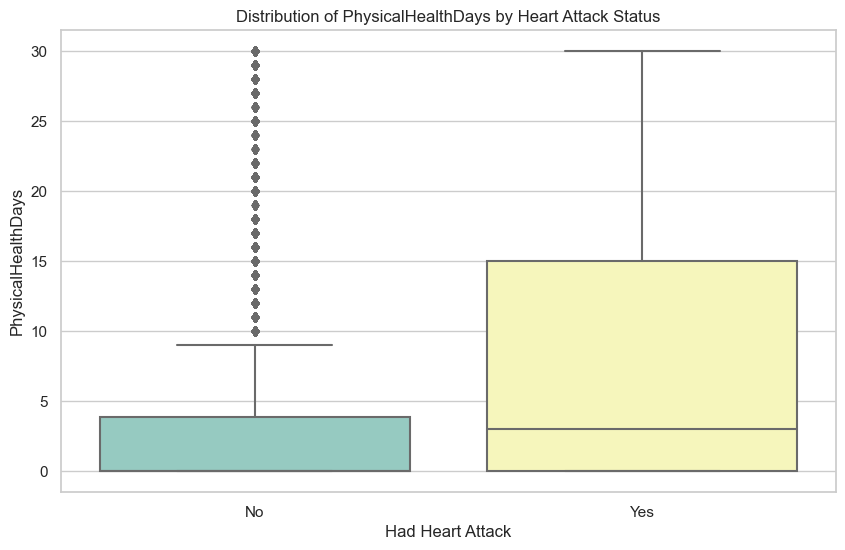

In [31]:
# Sleep Hours, BMI, MentalHealthDays are useless here
# Weight and heights had some kind of difference but in genreal the physical stuff is the best one
# Assuming your DataFrame is named df

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x="HadHeartAttack", y="PhysicalHealthDays", data=df, palette="Set3")

# Add labels and title
plt.xlabel("Had Heart Attack")
plt.ylabel("PhysicalHealthDays")
plt.title("Distribution of PhysicalHealthDays by Heart Attack Status")

# Show the plot
plt.show()

<Axes: xlabel='BMI', ylabel='WeightInKilograms'>

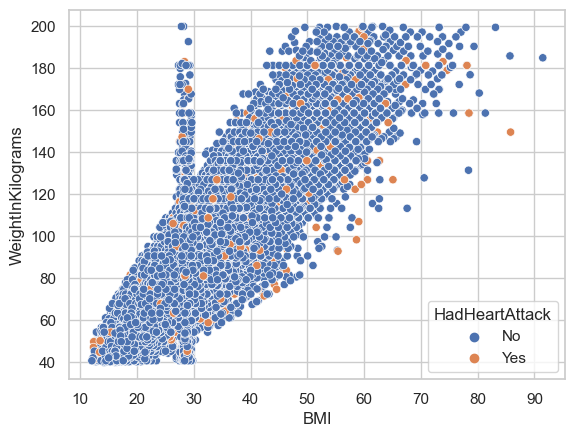

In [32]:
sns.scatterplot(x='BMI', y='WeightInKilograms', hue='HadHeartAttack', data=df)

In [36]:
state_coordinates = {
    'Alabama': (32.806671, -86.791130),
    'Alaska': (61.016042, -149.737070),
    'Arizona': (33.729759, -111.431221),
    'Arkansas': (34.969704, -92.373123),
    'California': (36.778259, -119.417931),
    'Colorado': (39.550051, -105.782067),
    'Connecticut': (41.603221, -73.087749),
    'Delaware': (39.739071, -75.539787),
    'District of Columbia': (38.895110, -77.036366),
    'Florida': (27.994402, -81.760254),
    'Georgia': (33.040619, -83.643074),
    'Hawaii': (20.796021, -156.331925),
    'Idaho': (44.068203, -114.742043),
    'Illinois': (40.633125, -89.398528),
    'Indiana': (40.551217, -85.602364),
    'Iowa': (41.878003, -93.097702),
    'Kansas': (39.011902, -98.484246),
    'Kentucky': (37.839333, -84.270020),
    'Louisiana': (31.244823, -92.145024),
    'Maine': (45.253783, -69.445469),
    'Maryland': (39.045753, -76.641273),
    'Massachusetts': (42.407211, -71.382439),
    'Michigan': (44.314844, -85.602364),
    'Minnesota': (46.729553, -94.685900),
    'Mississippi': (32.354668, -89.398528),
    'Missouri': (37.964253, -91.831833),
    'Montana': (46.879682, -110.362566),
    'Nebraska': (41.492537, -99.901813),
    'Nevada': (38.802610, -116.419389),
    'New Hampshire': (43.193852, -71.572395),
    'New Jersey': (40.058324, -74.405661),
    'New Mexico': (34.972730, -105.032363),
    'New York': (40.712776, -74.005974),
    'North Carolina': (35.759573, -79.019300),
    'North Dakota': (47.551493, -101.002012),
    'Ohio': (40.417287, -82.907123),
    'Oklahoma': (35.007752, -97.092877),
    'Oregon': (43.804133, -120.554201),
    'Pennsylvania': (41.203322, -77.194525),
    'Rhode Island': (41.580095, -71.477429),
    'South Carolina': (33.836082, -81.163727),
    'South Dakota': (43.969515, -99.901813),
    'Tennessee': (35.517491, -86.580447),
    'Texas': (31.968599, -99.901813),
    'Utah': (39.320980, -111.093731),
    'Vermont': (44.558803, -72.577841),
    'Virginia': (37.431573, -78.656894),
    'Washington': (47.751074, -120.740139),
    'West Virginia': (38.597626, -80.454903),
    'Wisconsin': (43.784439, -88.787868),
    'Wyoming': (43.075970, -107.290283),
    'Guam': (13.444304, 144.793731),
    'Puerto Rico': (18.220833, -66.590149),
    'Virgin Islands': (18.335765, -64.896335)
}


In [37]:
print(state_coordinates)

{'Alabama': (32.806671, -86.79113), 'Alaska': (61.016042, -149.73707), 'Arizona': (33.729759, -111.431221), 'Arkansas': (34.969704, -92.373123), 'California': (36.778259, -119.417931), 'Colorado': (39.550051, -105.782067), 'Connecticut': (41.603221, -73.087749), 'Delaware': (39.739071, -75.539787), 'District of Columbia': (38.89511, -77.036366), 'Florida': (27.994402, -81.760254), 'Georgia': (33.040619, -83.643074), 'Hawaii': (20.796021, -156.331925), 'Idaho': (44.068203, -114.742043), 'Illinois': (40.633125, -89.398528), 'Indiana': (40.551217, -85.602364), 'Iowa': (41.878003, -93.097702), 'Kansas': (39.011902, -98.484246), 'Kentucky': (37.839333, -84.27002), 'Louisiana': (31.244823, -92.145024), 'Maine': (45.253783, -69.445469), 'Maryland': (39.045753, -76.641273), 'Massachusetts': (42.407211, -71.382439), 'Michigan': (44.314844, -85.602364), 'Minnesota': (46.729553, -94.6859), 'Mississippi': (32.354668, -89.398528), 'Missouri': (37.964253, -91.831833), 'Montana': (46.879682, -110.362

In [38]:
heart_attack_counts = df[df['HadHeartAttack'] == 'Yes']['State'].value_counts().to_dict()

heart_attack_counts

{'Washington': 1206,
 'Ohio': 1120,
 'Florida': 1004,
 'Maryland': 863,
 'Texas': 835,
 'New York': 812,
 'Maine': 740,
 'Minnesota': 739,
 'Arizona': 700,
 'Indiana': 636,
 'Wisconsin': 633,
 'Kansas': 632,
 'Virginia': 578,
 'South Carolina': 575,
 'Michigan': 571,
 'Georgia': 556,
 'Massachusetts': 494,
 'New Hampshire': 489,
 'South Dakota': 487,
 'Nebraska': 478,
 'Vermont': 470,
 'Missouri': 453,
 'Iowa': 448,
 'Arkansas': 444,
 'Connecticut': 435,
 'West Virginia': 432,
 'California': 430,
 'Montana': 420,
 'Utah': 417,
 'Oklahoma': 407,
 'Tennessee': 363,
 'Colorado': 362,
 'Louisiana': 341,
 'New Jersey': 334,
 'Rhode Island': 330,
 'Idaho': 322,
 'Hawaii': 317,
 'Alaska': 313,
 'Alabama': 303,
 'New Mexico': 302,
 'Oregon': 288,
 'Kentucky': 283,
 'Puerto Rico': 270,
 'North Dakota': 253,
 'Wyoming': 245,
 'Pennsylvania': 234,
 'Mississippi': 225,
 'North Carolina': 214,
 'Delaware': 205,
 'Nevada': 197,
 'Illinois': 164,
 'Guam': 117,
 'District of Columbia': 110,
 'Virgin I

In [39]:
import folium
import pandas as pd

# Assuming you have state_coordinates and heart_attack_counts defined

# Create a DataFrame with state, latitude, longitude, and heart attacks data
df_map = pd.DataFrame(list(heart_attack_counts.items()), columns=['State', 'HeartAttacks'])
df_map['Latitude'] = df_map['State'].map(lambda state: state_coordinates[state][0])
df_map['Longitude'] = df_map['State'].map(lambda state: state_coordinates[state][1])

# Create a folium map centered at the average latitude and longitude
average_lat = sum(lat for lat, _ in state_coordinates.values()) / len(state_coordinates)
average_lon = sum(lon for _, lon in state_coordinates.values()) / len(state_coordinates)
m = folium.Map(location=[average_lat, average_lon], zoom_start=4)

# Create a choropleth map with GeoJsonTooltip
folium.Choropleth(
	geo_data='us-states.json',  # Path to the GeoJSON file containing state boundaries
	name='choropleth',
	data=df_map,
	columns=['State', 'HeartAttacks'],
	key_on='feature.properties.name',
	fill_color='YlOrRd',
	fill_opacity=0.7,
	line_opacity=0.2,
	legend_name='Heart Attacks',
	highlight=True,  # Enable highlighting
).add_to(m)

# Add GeoJsonTooltip to display state names
folium.GeoJson(
    'us-states.json',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'transparent',
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['State'], labels=True, sticky=True)
).add_to(m)

# Display the map
m


In [ ]:
#blabla

In [40]:
# Group the data by height and weight, and calculate the count of heart attacks for each group
grouped = df.groupby(['HeightInMeters', 'WeightInKilograms'])['HadHeartAttack'].count().reset_index()

# Sort the results in descending order
sorted_grouped = grouped.sort_values('HadHeartAttack', ascending=False)

# Get the range with the highest count
height_range = sorted_grouped['HeightInMeters'].iloc[0]
weight_range = sorted_grouped['WeightInKilograms'].iloc[0]

# Print the result
print(f"People within the height range {height_range} and weight range {weight_range} suffer the most from heart attacks.")


People within the height range 1.83 and weight range 90.72 suffer the most from heart attacks.


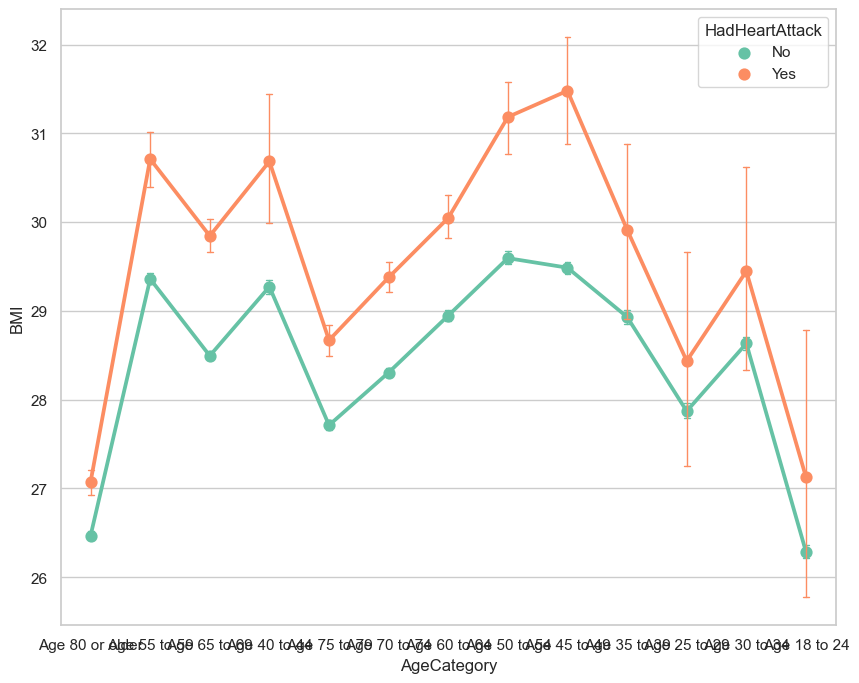

In [41]:
# 8. Point Plot with Error Bars
plt.figure(figsize=(10, 8))
sns.pointplot(x='AgeCategory', y='BMI', hue='HadHeartAttack', data=df, capsize=.1, errwidth=1, palette="Set2")
plt.show()

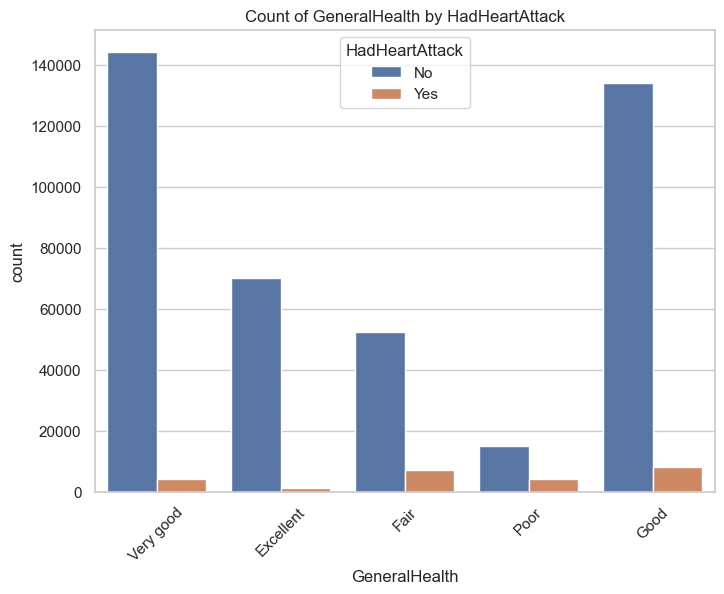

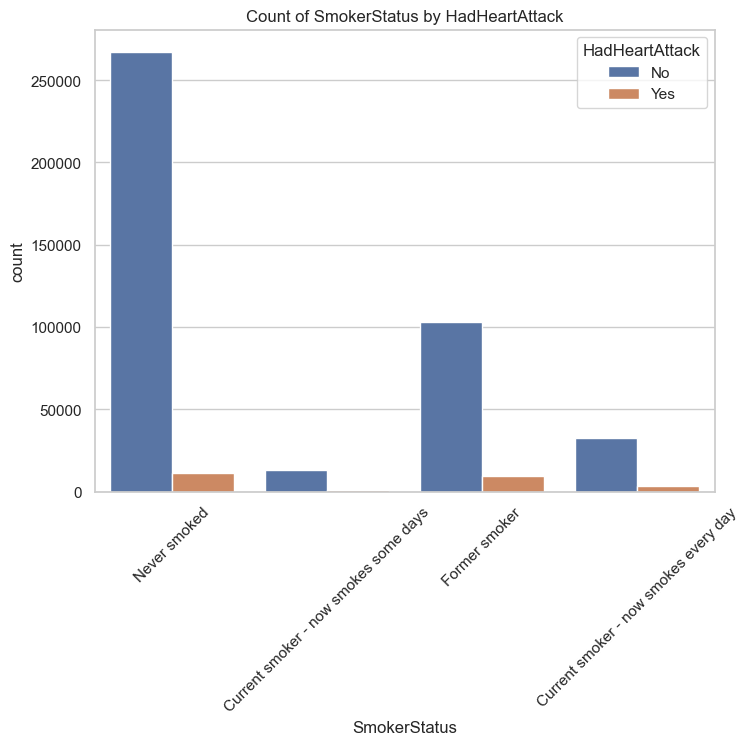

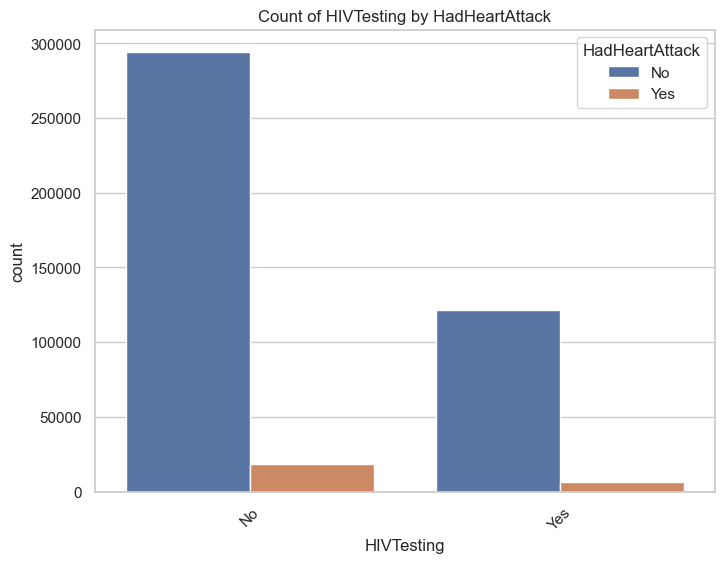

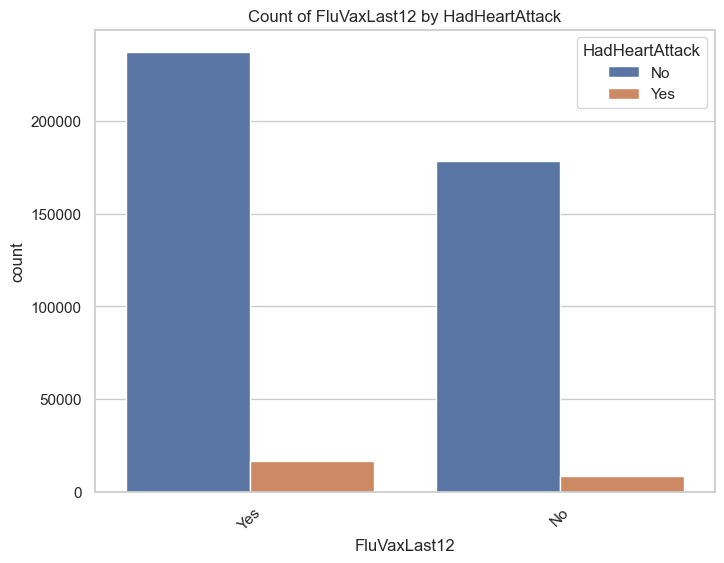

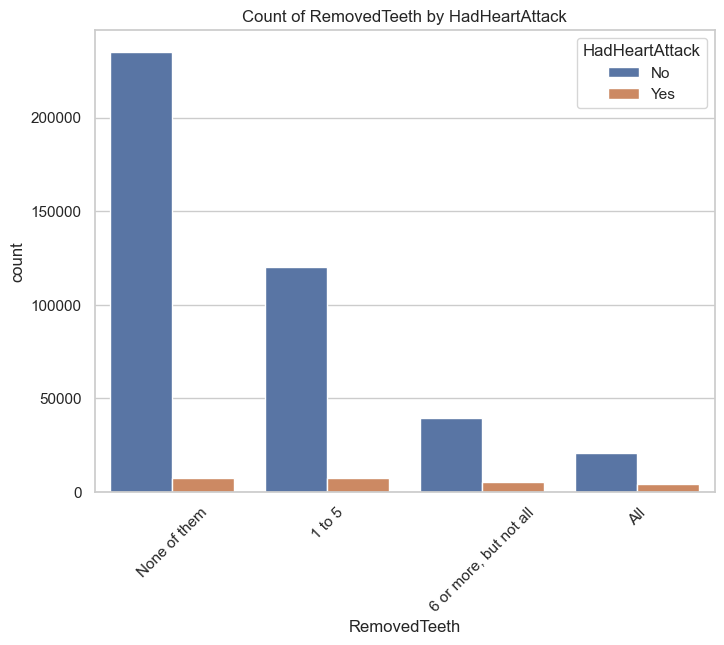

In [42]:
# 1. Bar Chart comparing HadHeartAttack with other categorical variables
categorical_vars = ['GeneralHealth', 'SmokerStatus', 'HIVTesting', 'FluVaxLast12', 'RemovedTeeth']

for cat_var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=cat_var, hue='HadHeartAttack')
    plt.title(f'Count of {cat_var} by HadHeartAttack')
    plt.xticks(rotation=45)
    plt.show()

In [43]:
!pip install streamlit

SyntaxError: invalid syntax (480923647.py, line 1)

In [50]:
import streamlit as st
import folium
import pandas as pd

# Load data and create DataFrame df_map

# Assuming you have state_coordinates and heart_attack_counts defined
state_coordinates = {'New York': (40.7128, -74.0060), 'California': (36.7783, -119.4179)}  # Example coordinates
heart_attack_counts = {'New York': 100, 'California': 150}  # Example data

# Create a DataFrame with state, latitude, longitude, and heart attacks data
df_map = pd.DataFrame(list(heart_attack_counts.items()), columns=['State', 'HeartAttacks'])
df_map['Latitude'] = df_map['State'].map(lambda state: state_coordinates[state][0])
df_map['Longitude'] = df_map['State'].map(lambda state: state_coordinates[state][1])

# Create a folium map centered at the average latitude and longitude
average_lat = sum(lat for lat, _ in state_coordinates.values()) / len(state_coordinates)
average_lon = sum(lon for _, lon in state_coordinates.values()) / len(state_coordinates)
m = folium.Map(location=[average_lat, average_lon], zoom_start=4)

# Create a choropleth map with GeoJsonTooltip
folium.Choropleth(
    geo_data='us-states.json',  # Path to the GeoJSON file containing state boundaries
    name='choropleth',
    data=df_map,
    columns=['State', 'HeartAttacks'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Heart Attacks',
    highlight=True,  # Enable highlighting
).add_to(m)

# Add GeoJsonTooltip to display state names
folium.GeoJson(
    'us-states.json',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'transparent',
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['State'], labels=True, sticky=True)
).add_to(m)

# Display the map
st.write(m._repr_html_(), unsafe_allow_html=True)


In [46]:
import streamlit as st
import folium
import pandas as pd

# Assuming you have state_coordinates and heart_attack_counts defined
state_coordinates = {'New York': (40.7128, -74.0060), 'California': (36.7783, -119.4179)}  # Example coordinates
heart_attack_counts = {'New York': 100, 'California': 150}  # Example data

# Create a DataFrame with state, latitude, longitude, and heart attacks data
df_map = pd.DataFrame(list(heart_attack_counts.items()), columns=['State', 'HeartAttacks'])
df_map['Latitude'] = df_map['State'].map(lambda state: state_coordinates[state][0])
df_map['Longitude'] = df_map['State'].map(lambda state: state_coordinates[state][1])

# Create a folium map centered at the average latitude and longitude
average_lat = sum(lat for lat, _ in state_coordinates.values()) / len(state_coordinates)
average_lon = sum(lon for _, lon in state_coordinates.values()) / len(state_coordinates)
m = folium.Map(location=[average_lat, average_lon], zoom_start=4)

# Create a choropleth map with GeoJsonTooltip
folium.Choropleth(
    geo_data='us-states.json',  # Path to the GeoJSON file containing state boundaries
    name='choropleth',
    data=df_map,
    columns=['State', 'HeartAttacks'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Heart Attacks',
    highlight=True,  # Enable highlighting
).add_to(m)

# Add GeoJsonTooltip to display state names
folium.GeoJson(
    'us-states.json',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'transparent',
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['State'], labels=True, sticky=True)
).add_to(m)

# Display the map
m._repr_html_()


'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

In [ ]:
%streamlit

In [ ]:
import streamlit as st

# Define your Streamlit app here
st.title('My Streamlit App')
st.write('This is a Streamlit app running in a Jupyter Notebook!')